In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading the data
loan_data_train=pd.read_csv('/content/train_ctrUa4K.csv')
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Understanding the data

In [ ]:
loan_data_train.shape

(614, 13)

In [ ]:
loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#checking the null values
loan_data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

EDA

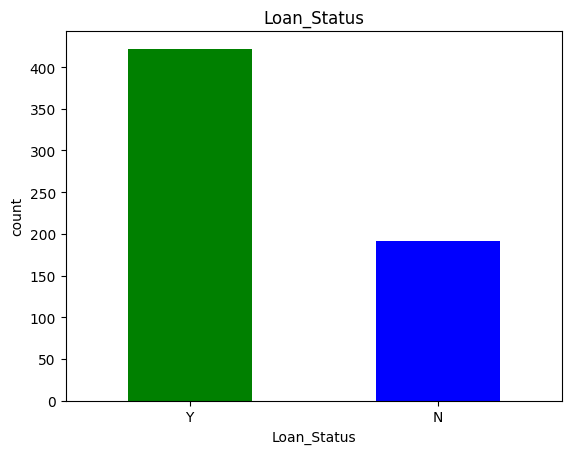

In [ ]:
#loan status
loan_data_train['Loan_Status'].value_counts().plot(kind='bar',color=['green','blue'])
plt.title('Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()





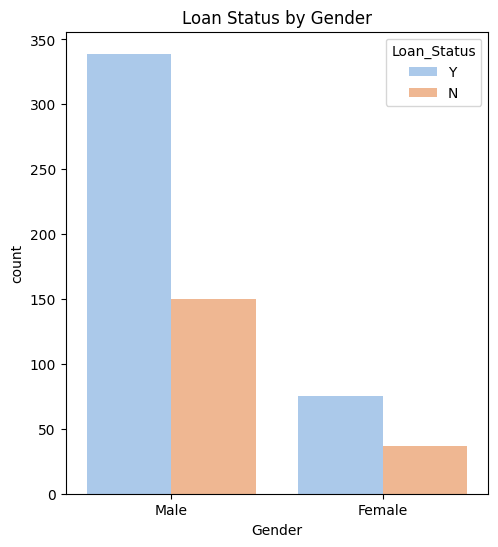

In [ ]:
#Relationship between Gender and Loan status
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data_train,palette='pastel')
plt.title('Loan Status by Gender')
plt.show()

Text(0, 0.5, 'Credit_History')

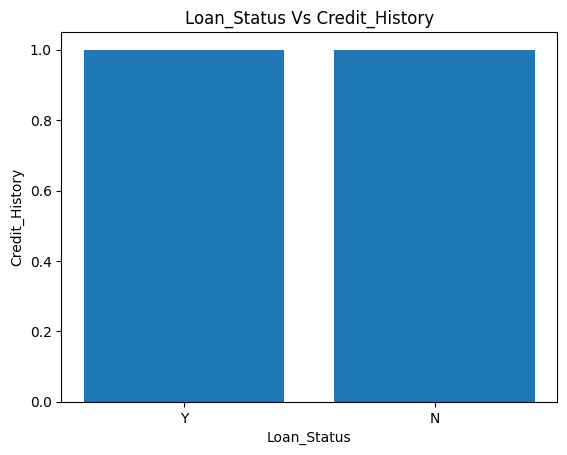

In [ ]:
plt.bar(loan_data_train['Loan_Status'],loan_data_train['Credit_History'])
plt.title('Loan_Status Vs Credit_History')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')

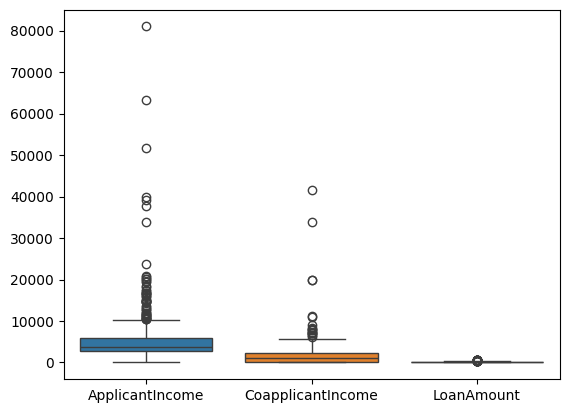

In [ ]:
#comparison of Applicant Income,Coapplicant Income Vs Loan amount
sns.boxplot(loan_data_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.show()

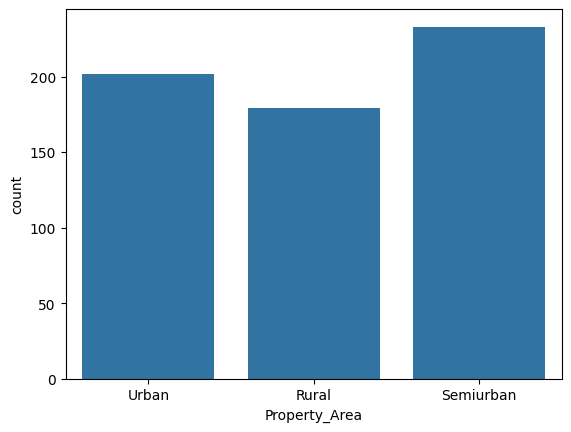

In [ ]:
sns.countplot(x=loan_data_train.Property_Area)
plt.show()

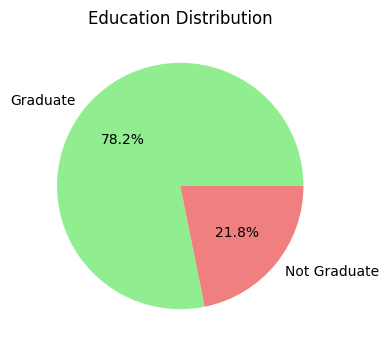

In [ ]:
#Pie chart for Education
plt.figure(figsize=(6,4))
loan_data_train['Education'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen','lightcoral'])
plt.title('Education Distribution')
plt.ylabel('')
plt.show()


Distribution

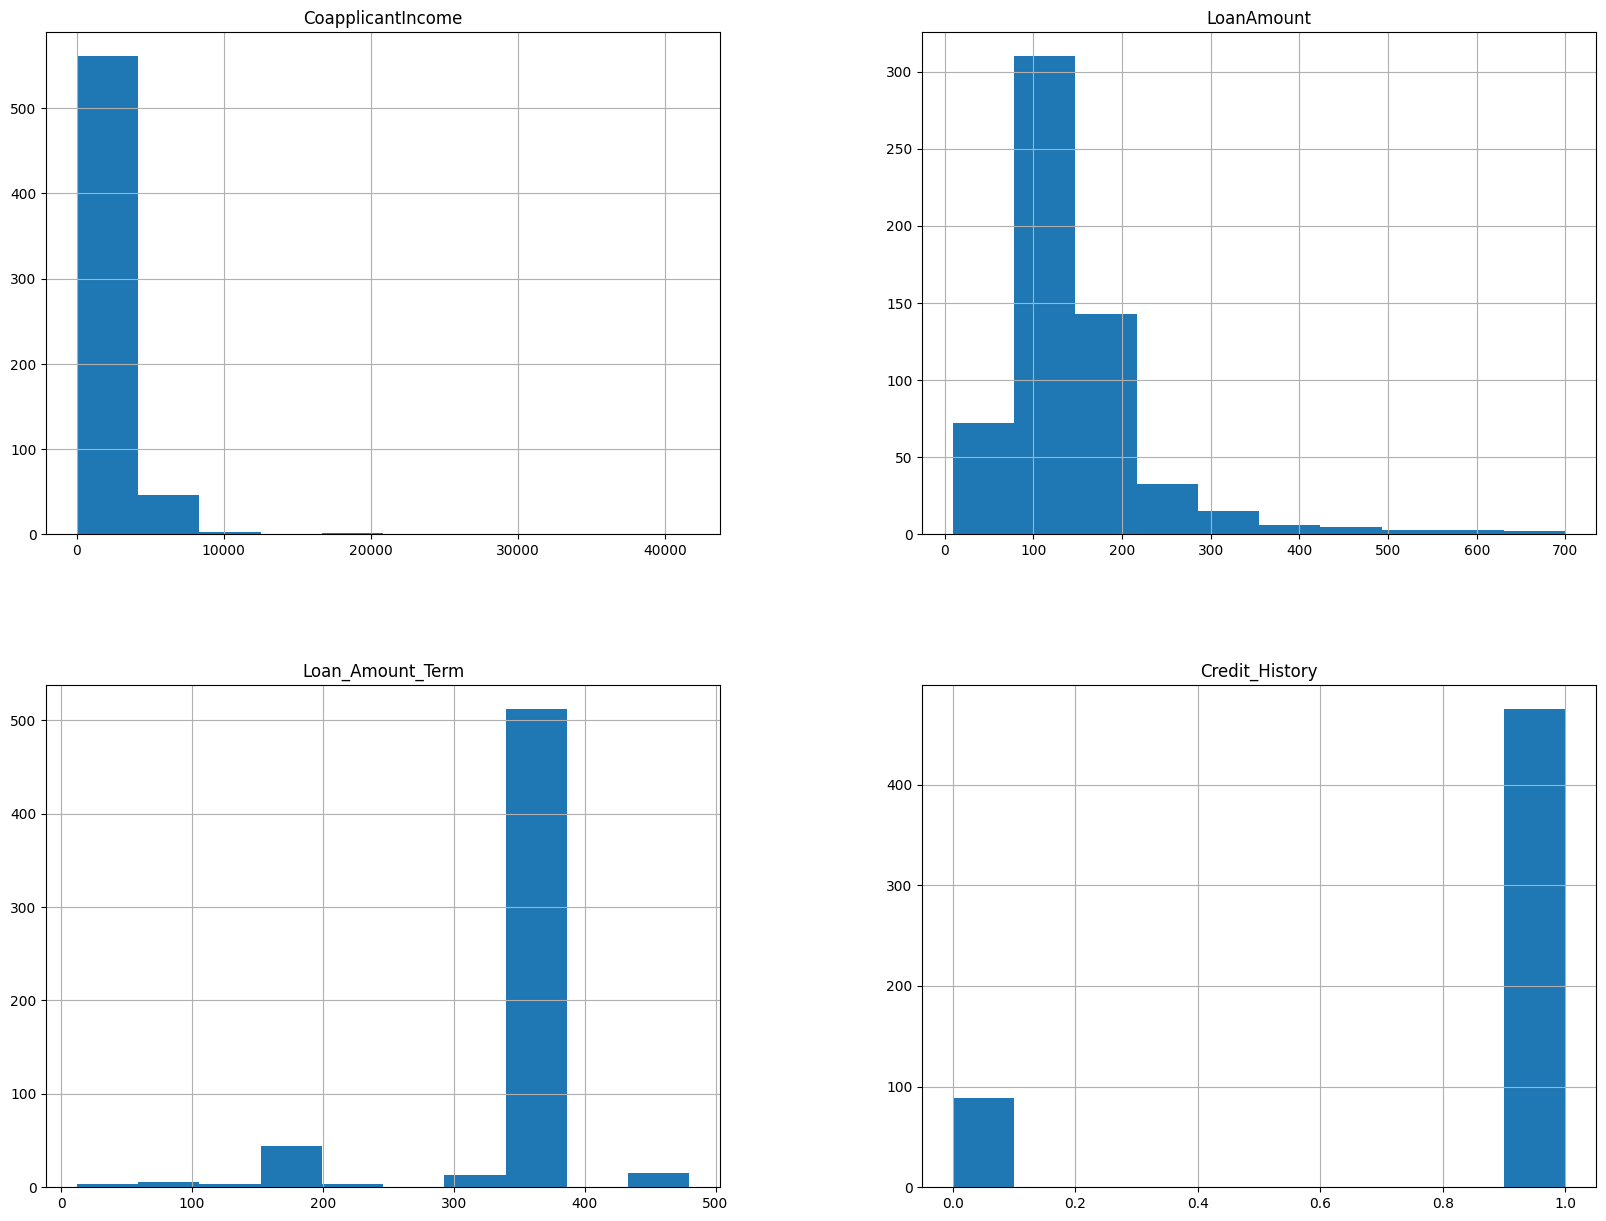

In [ ]:
freqgraph = loan_data_train.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [ ]:
loan_data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#filling the missing values using mode
for i in loan_data_train[['Gender','Married','Dependents','Self_Employed']]:
  loan_data_train[i] = loan_data_train[i].fillna(loan_data_train[i].mode()[0])


In [ ]:
loan_data_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling the missing value using mean,median
loan_data_train['LoanAmount'] = loan_data_train['LoanAmount'].fillna(loan_data_train['LoanAmount'].median())
loan_data_train['Loan_Amount_Term'] = loan_data_train['Loan_Amount_Term'].fillna(loan_data_train['Loan_Amount_Term'].mean())
loan_data_train['Credit_History'] = loan_data_train['Credit_History'].fillna(loan_data_train['Credit_History'].mean())


In [ ]:
loan_data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data_train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


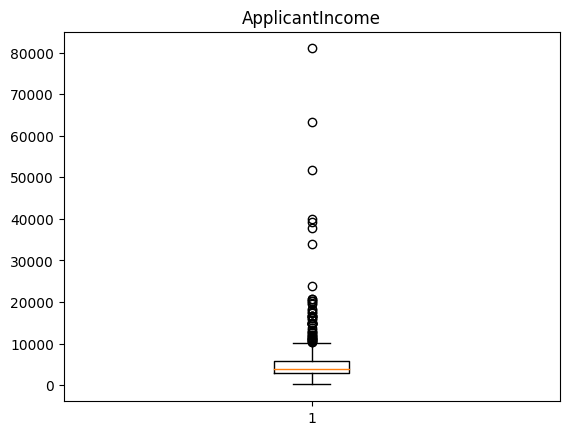

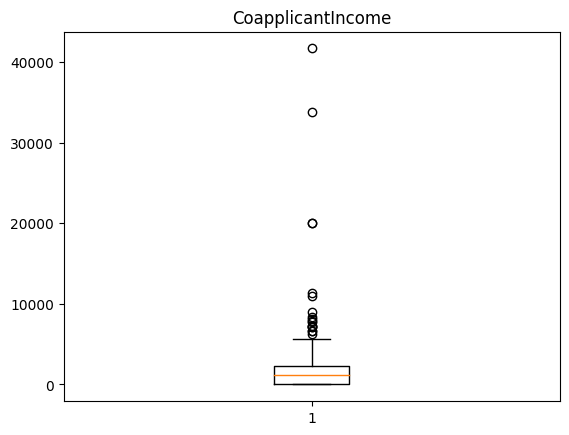

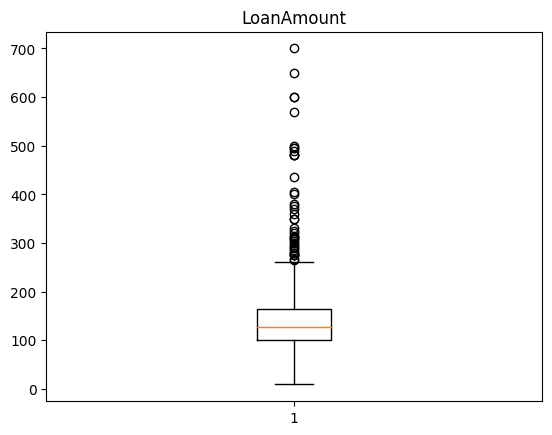

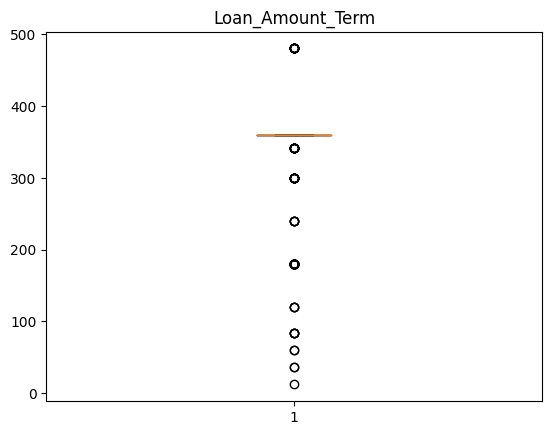

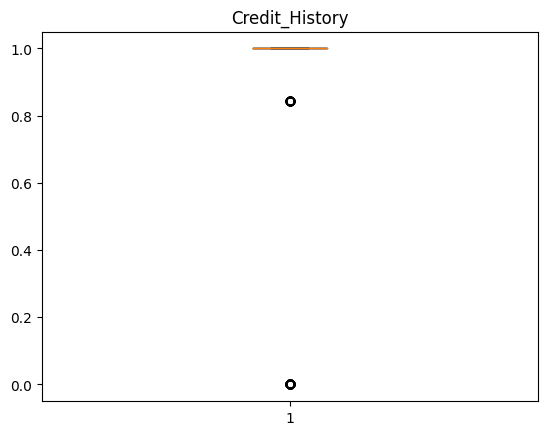

In [ ]:
# Checking Outliers
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']


for i in num_columns:
  plt.figure()
  plt.boxplot(loan_data_train[i])
  plt.title(i);

In [ ]:
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns: # Handling outlier using IQR method
  Q1 = loan_data_train[i].quantile(0.25)
  Q3 = loan_data_train[i].quantile(0.75)

# Calculate the interquartile range (IQR)
  IQR = Q3 - Q1

# Define the lower and upper limit for outliers
  lower_lim = Q1 - 1.5 * IQR
  upper_lim = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper limit
  loan_data_train[i] = loan_data_train[i].clip(lower=lower_lim, upper=upper_lim)



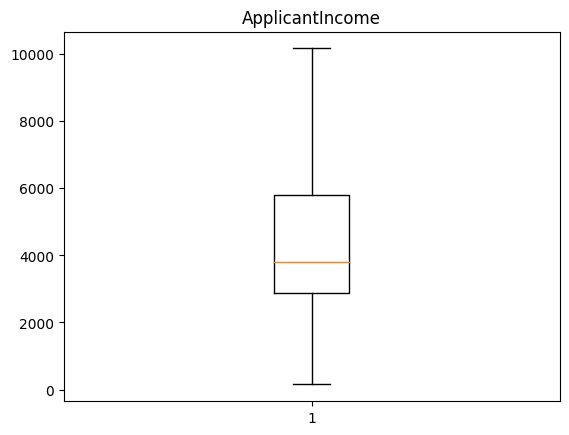

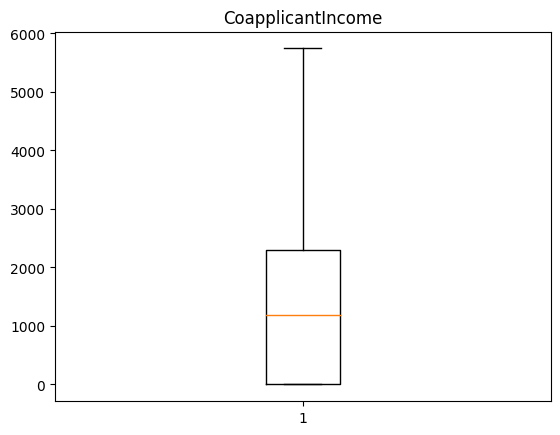

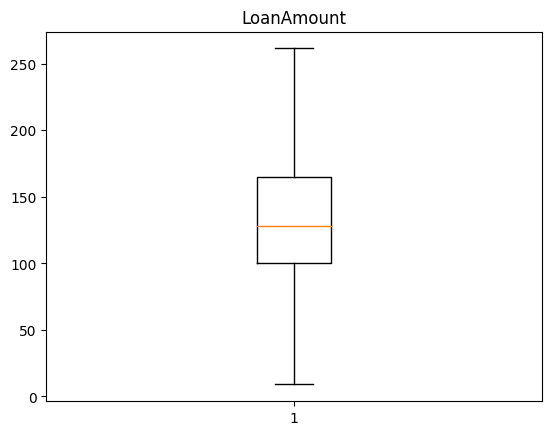

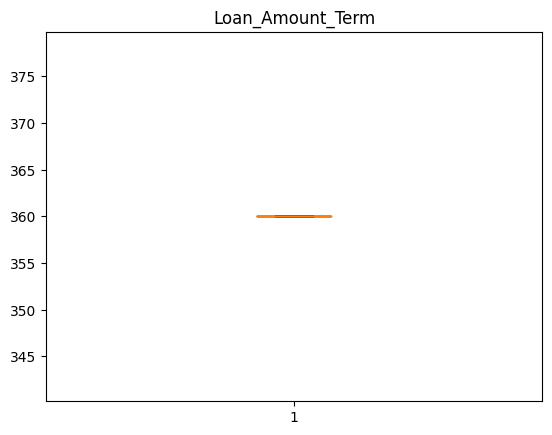

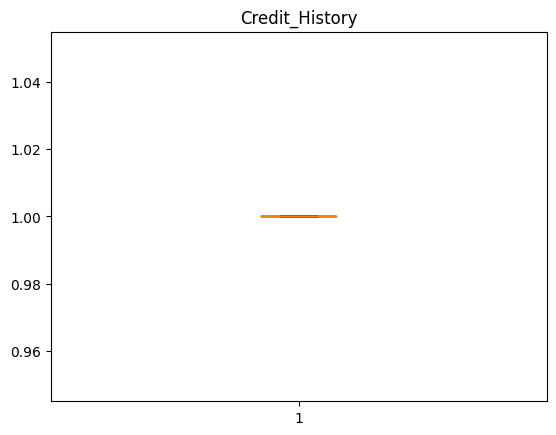

In [ ]:
# Checking Outliers
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']


for i in num_columns:
  plt.figure()
  plt.boxplot(loan_data_train[i])
  plt.title(i);

In [ ]:
loan_data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data_train['Loan_ID'].nunique()

614

In [ ]:
loan_data_train['Gender'].nunique()

2

In [ ]:
loan_data_train['Married'].nunique()

2

In [ ]:
loan_data_train['Dependents'].nunique()

4

In [ ]:
loan_data_train['Education'].nunique()

2

In [ ]:
loan_data_train['Property_Area'].nunique()

3

In [ ]:
loan_data_train['Self_Employed'].nunique()


2

In [ ]:
loan_data_train['Loan_Status'].nunique()

2

In [ ]:
loan_data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

en_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Loan_ID']
for i in en_col:
  loan_data_train[i]=le.fit_transform(loan_data_train[i])

In [ ]:
loan_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [ ]:
loan_data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


In [ ]:
loan_data_train.shape

(614, 13)

<Axes: >

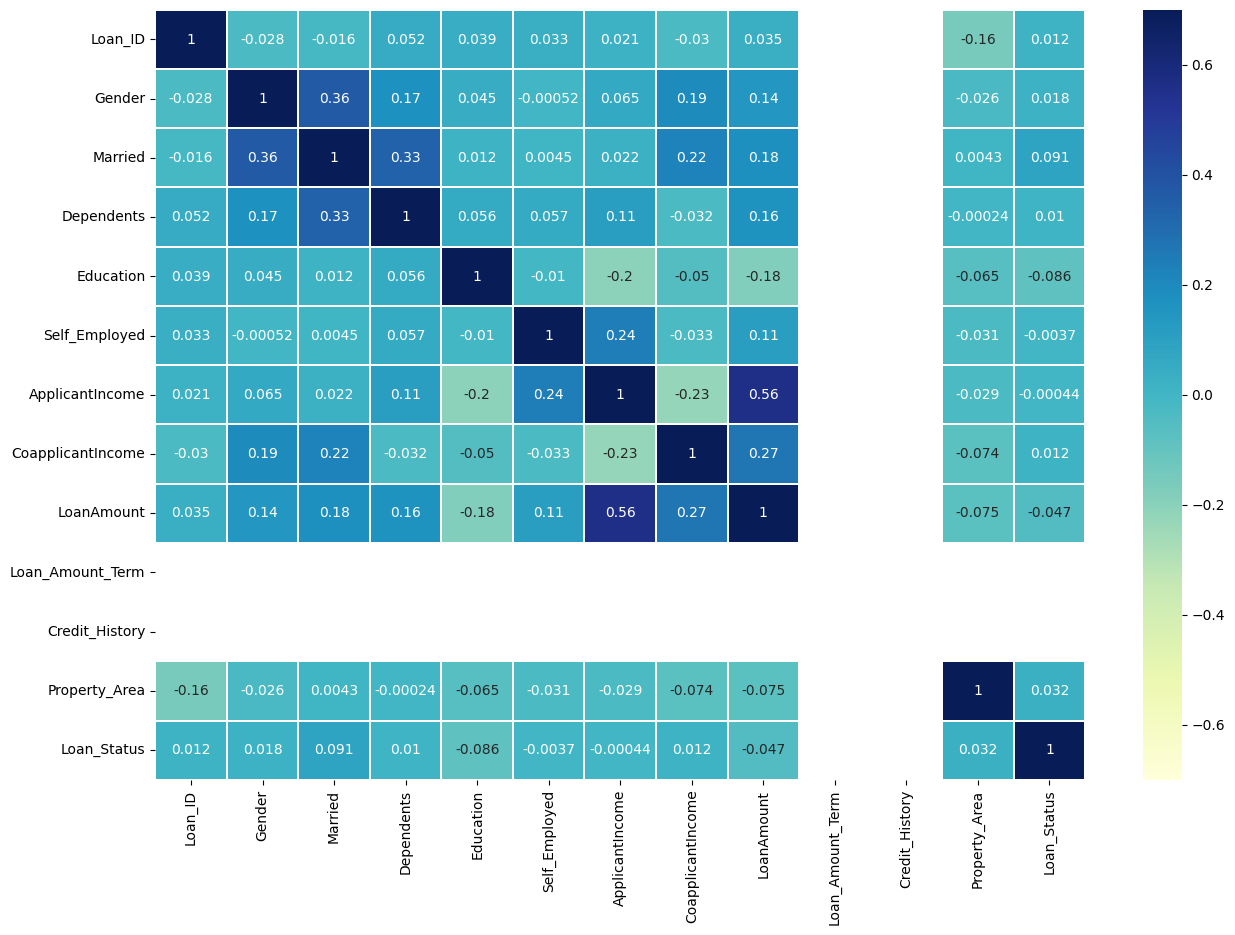

In [ ]:
# Find the correlation of this dataset using a heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(loan_data_train.corr(),vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
loan_data_train.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,4617.111564,1419.702231,137.365635,360.0,1.0,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,2479.851729,1624.605892,55.779749,0.0,0.0,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.0,1.0,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.0,1.0,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.0,1.0,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10171.250000,5743.125000,261.500000,360.0,1.0,2.000000,1.000000


In [ ]:
#Splitting dependent and independent features
y = loan_data_train['Loan_Status']
x = loan_data_train.drop('Loan_Status',axis=1)

In [ ]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)


*LogisticRegression*

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
#fitting train sets into LogisticRegression
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#doing prediction on test set
y_log_pred=log_reg.predict(x_test)

In [ ]:
y_log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[ 0, 38],
       [ 0, 85]])

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_log_pred))
print('Precision:',precision_score(y_test,y_log_pred))
print('recall:',recall_score(y_test,y_log_pred))
print('F1:',f1_score(y_test,y_log_pred))

Accuracy: 0.6910569105691057
Precision: 0.6910569105691057
recall: 1.0
F1: 0.8173076923076924


LogisticRegression-after scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()


In [ ]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [ ]:
log_reg.fit(x_train_scale,y_train)
y_log_pred=log_reg.predict(x_test_scale)

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[ 0, 38],
       [ 1, 84]])

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_log_pred))
print('Precision:',precision_score(y_test,y_log_pred))
print('recall:',recall_score(y_test,y_log_pred))
print('F1:',f1_score(y_test,y_log_pred))

Accuracy: 0.6829268292682927
Precision: 0.6885245901639344
recall: 0.9882352941176471
F1: 0.8115942028985508


KNN-after scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train_scale,y_train)
  y_pred_knn=classifier.predict(x_test_scale)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

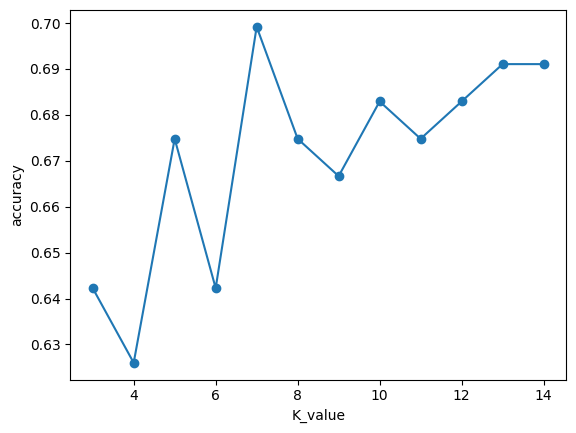

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(x_train_scale,y_train)
y_pred_knn=classifier.predict(x_test_scale)




In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('F1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.6991869918699187
Precision: 0.7105263157894737
recall: 0.9529411764705882
F1: 0.814070351758794


Text(0, 0.5, 'accuracy')

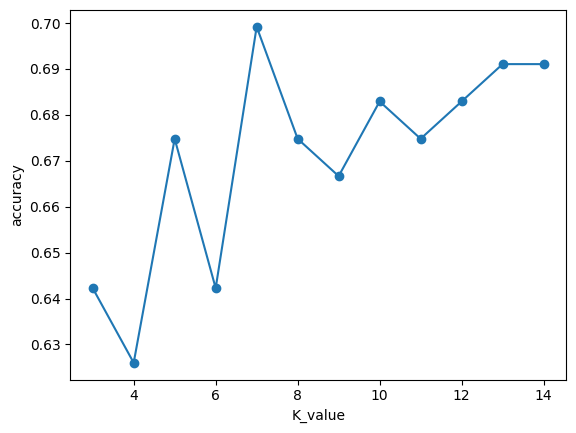

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

SVM-After scaling

In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
#fitting train sets into SVM

sv_cl.fit(x_train_scale,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=sv_cl.predict(x_test_scale)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6910569105691057


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[ 0 38]
 [ 0 85]]


Decision Tree-After scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()

#fitting train sets into Decision Tree

dt_clf.fit(x_train_scale,y_train)
y_pred=dt_clf.predict(x_test_scale)

In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))


Accuracy is: 0.7154471544715447


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[18 20]
 [15 70]]


Random Forest-After Scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()

#fitting train sets into Random Forest

rf_clf.fit(x_train_scale,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf.predict(x_test_scale)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.6747967479674797


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[ 7 31]
 [ 9 76]]


Before scaling

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

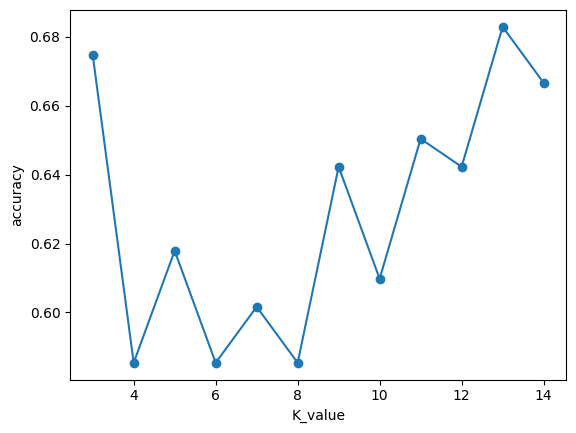

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('F1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.6829268292682927
Precision: 0.7017543859649122
recall: 0.9411764705882353
F1: 0.8040201005025126


SVM-before scaling

In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='rbf')
#fitting train sets into SVM

sv_cl.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=sv_cl.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6910569105691057


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[ 0 38]
 [ 0 85]]


*Decision Tree*-before scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()

#fitting train sets into Decision Tree

dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [ ]:
print('Accuracy is:',accuracy_score(y_test,y_pred))


Accuracy is: 0.7073170731707317


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[17 21]
 [15 70]]


*Random Forest*-before scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()

#fitting train sets into Random Forest

rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf.predict(x_test)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))


Accuracy: 0.6829268292682927


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[ 7 31]
 [ 8 77]]


In [ ]:
loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


hold out cross validation-Decision Tree

In [ ]:
loan_data_train['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
dt_model=dt_clf.fit(x_train,y_train)


In [ ]:
score_log=dt_model.score(x_test,y_test)

In [ ]:
score_log

0.6910569105691057

In [ ]:
#Stratified CV
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)



In [ ]:
from sklearn.model_selection import cross_val_score
cv_score_sr=cross_val_score(dt_model,x,y,cv=stratified_cv)

In [ ]:
for train_index,test_index in stratified_cv.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 3

In [ ]:
cv_score_sr

array([0.4516129 , 0.62903226, 0.5483871 , 0.58064516, 0.67213115,
       0.60655738, 0.60655738, 0.67213115, 0.52459016, 0.3442623 ])

In [ ]:
cv_score_sr.mean()

0.5635906927551559

Random model-cross validation

In [ ]:
ran_model=rf_clf.fit(x_train,y_train)

In [ ]:
score_log=ran_model.score(x_test,y_test)

In [ ]:
score_log

0.6910569105691057

In [ ]:
#Stratified CV
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)


In [ ]:
cv_score_sr=cross_val_score(ran_model,x,y,cv=stratified_cv)

In [ ]:
for train_index,test_index in stratified_cv.split(x,y):
  print('train_index:', train_index)
  print('test_index:', test_index)

train_index: [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 3

In [ ]:
cv_score_sr

array([0.30645161, 0.70967742, 0.67741935, 0.66129032, 0.68852459,
       0.62295082, 0.62295082, 0.67213115, 0.63934426, 0.40983607])

In [ ]:
cv_score_sr.mean()

0.6010576414595452

In [ ]:
#loading the test dataset
loan_data_test=pd.read_csv('/content/test_lAUu6dG.csv')
loan_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
loan_data_test.shape

(367, 12)

In [ ]:
loan_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
loan_data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
loan_data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#filling the missing value using mode
for i in loan_data_test[['Gender','Dependents','Self_Employed']]:
  loan_data_test[i] = loan_data_test[i].fillna(loan_data_test[i].mode()[0])


Distribution

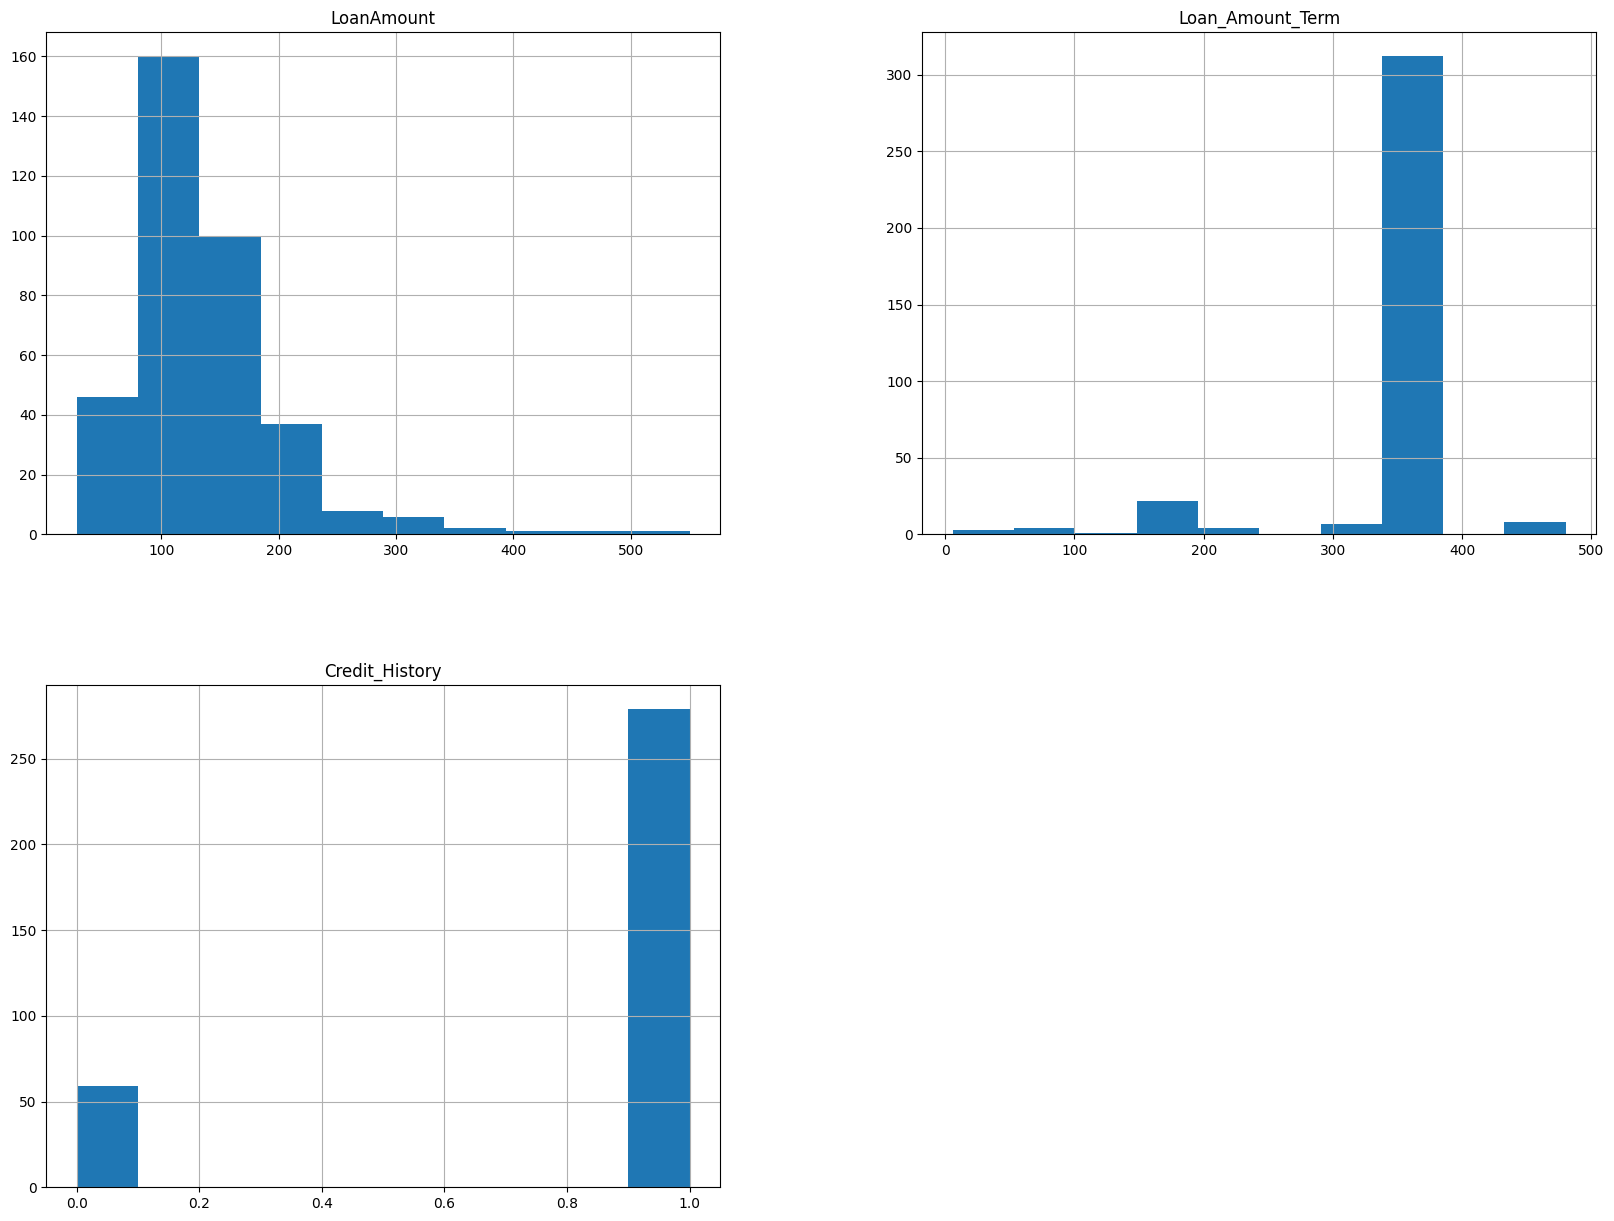

In [ ]:
freqgraph =loan_data_test.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [ ]:
#filling the missing value using median,mean
loan_data_test['LoanAmount'] = loan_data_test['LoanAmount'].fillna(loan_data_test['LoanAmount'].median())
loan_data_test['Loan_Amount_Term'] = loan_data_test['Loan_Amount_Term'].fillna(loan_data_test['Loan_Amount_Term'].mean())
loan_data_test['Credit_History'] = loan_data_test['Credit_History'].fillna(loan_data_test['Credit_History'].mean())


In [ ]:
loan_data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
loan_data_test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
loan_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


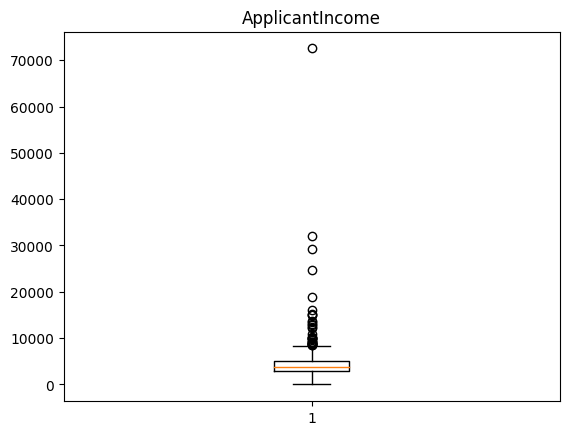

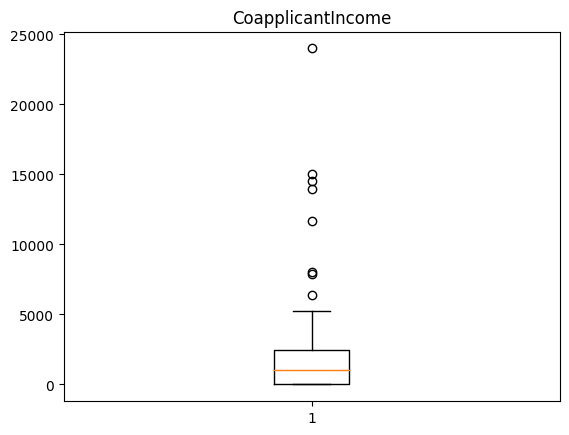

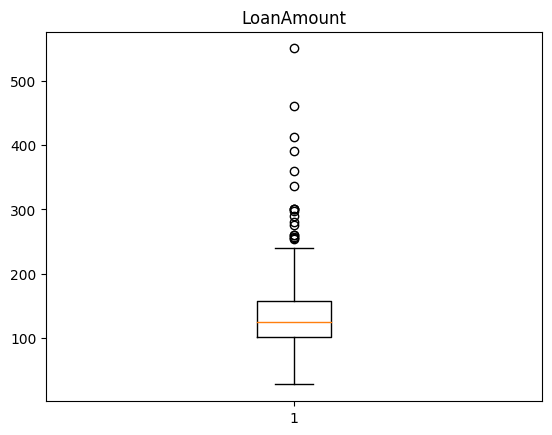

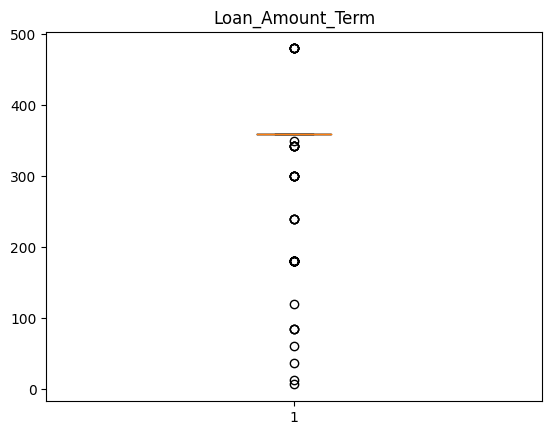

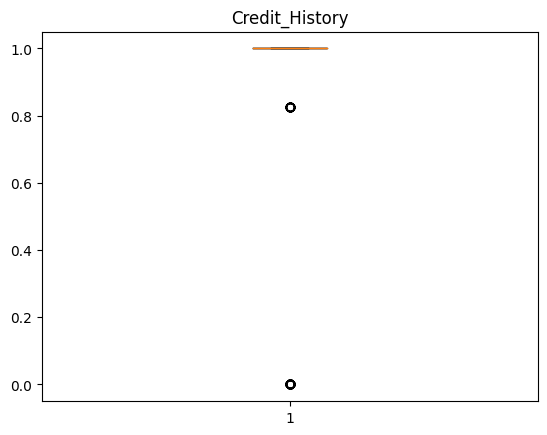

In [ ]:
# Checking Outliers
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']


for i in num_columns:
  plt.figure()
  plt.boxplot(loan_data_test[i])
  plt.title(i);

In [ ]:
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_columns: # Handling outlier using IQR method
  Q1 = loan_data_test[i].quantile(0.25)
  Q3 = loan_data_test[i].quantile(0.75)

# Calculate the interquartile range (IQR)
  IQR = Q3 - Q1

# Define the lower and upper limit for outliers
  lower_lim = Q1 - 1.5 * IQR
  upper_lim = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper limit
  loan_data_test[i] = loan_data_test[i].clip(lower=lower_lim, upper=upper_lim)



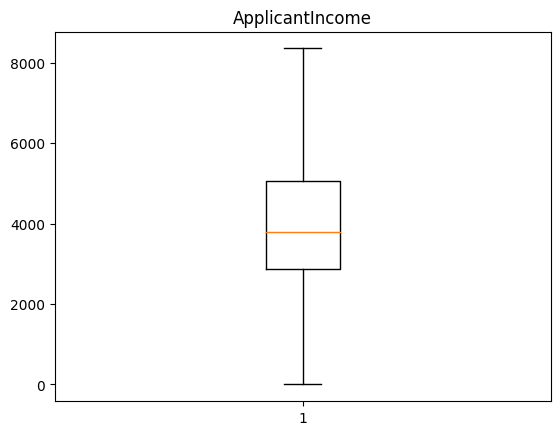

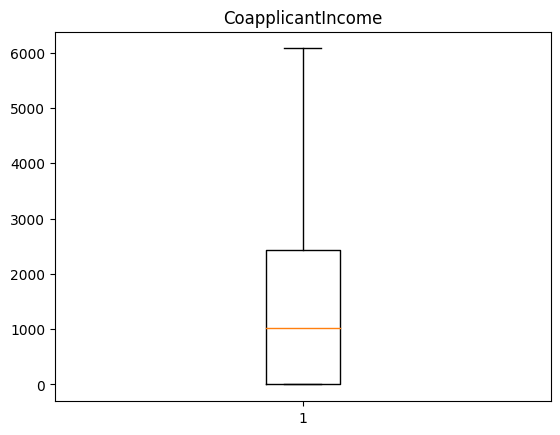

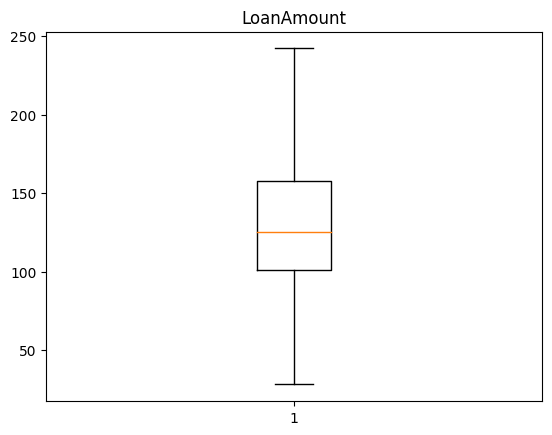

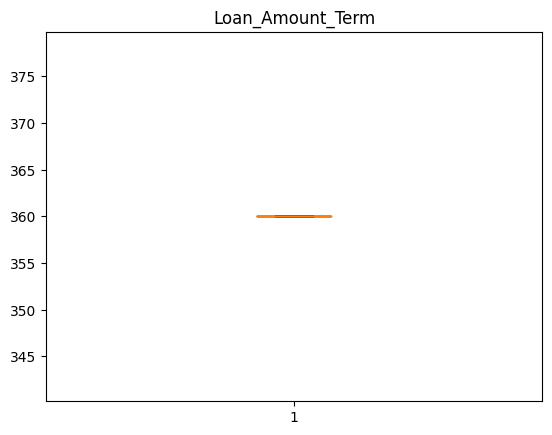

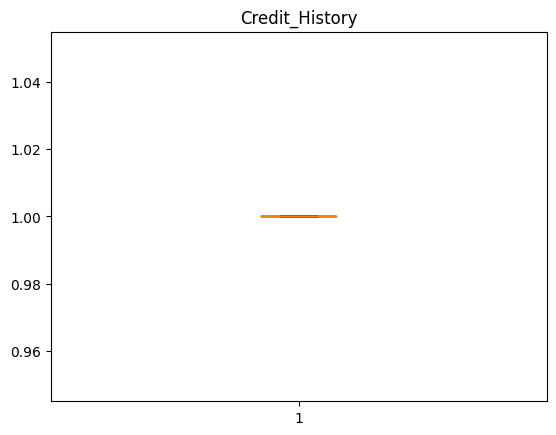

In [ ]:
# Checking Outliers
num_columns=['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']


for i in num_columns:
  plt.figure()
  plt.boxplot(loan_data_test[i])
  plt.title(i);

In [ ]:
loan_data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 34.5+ KB


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

en_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in en_col:
  loan_data_test[i]=le.fit_transform(loan_data_test[i])

In [ ]:
loan_data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0


In [ ]:
loan_data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [ ]:
loan_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


In [ ]:
loan_data_test2 = loan_data_test.copy()

In [ ]:
loan_data_test2['Loan_ID']=le.fit_transform(loan_data_test2['Loan_ID'])

In [ ]:
pred=dt_clf.predict(loan_data_test2)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
Loan_status = pd.Series(pred).replace({1: 'Y', 0: 'N'})

In [ ]:
Loan_status

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
362    Y
363    Y
364    Y
365    N
366    N
Length: 367, dtype: object

In [ ]:
result=pd.DataFrame({'Loan_ID': loan_data_test['Loan_ID'],'Loan_Status':Loan_status})
result

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [ ]:
result['Loan_Status'].value_counts()

Loan_Status
Y    231
N    136
Name: count, dtype: int64

In [ ]:
#save dataframe as csv
result.to_csv('sample3.csv', index=False)